In [1]:
!pip install transformers

  Using cached transformers-4.53.1-py3-none-any.whl.metadata (40 kB)
  Using cached huggingface_hub-0.33.2-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.21.2-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl.metadata (3.8 kB)
  Using cached hf_xet-1.1.5-cp37-abi3-macosx_11_0_arm64.whl.metadata (879 bytes)
Using cached transformers-4.53.1-py3-none-any.whl (10.8 MB)
Using cached huggingface_hub-0.33.2-py3-none-any.whl (515 kB)
Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl (418 kB)
Using cached tokenizers-0.21.2-cp39-abi3-macosx_11_0_arm64.whl (2.7 MB)
Using cached hf_xet-1.1.5-cp37-abi3-macosx_11_0_arm64.whl (2.6 MB)


In [2]:
import transformers #type: ignore

In [3]:
from transformers import GPT2LMHeadModel # type: ignore

In [4]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict() # raw tensors

for k, v in sd_hf.items():
    print(k, v.shape)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [5]:
total_params = sum(p.numel() for p in sd_hf.values())
print(f"total parameters: {total_params}")

total parameters: 163037184


In [7]:
total_params = sum(p.numel() for p in model_hf.parameters())
print(f"Total parameters: {total_params:,}")


Total parameters: 124,439,808


In [12]:
# first 10 params of the positional encodings (1024, 768)
sd_hf["transformer.wpe.weight"].view(-1)[:10]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565])

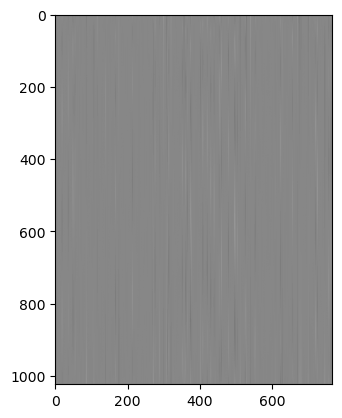

In [16]:
# plot the pos. enc.:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"], cmap="grey")
plt.show()

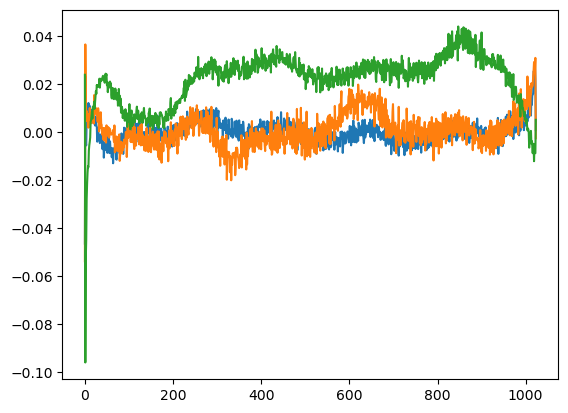

In [35]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])
plt.show()

In [24]:
print(x[:, 2])

tensor([-0.5459, -1.1139, -1.2540,  0.8162, -1.5004,  1.0871,  1.0212,  1.1613])


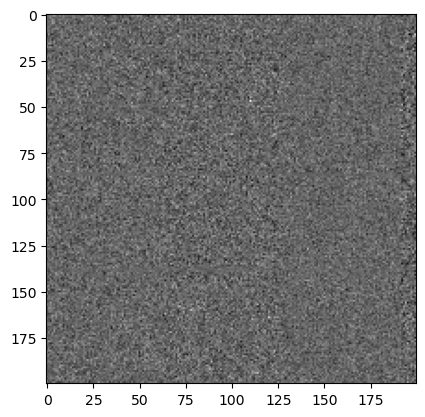

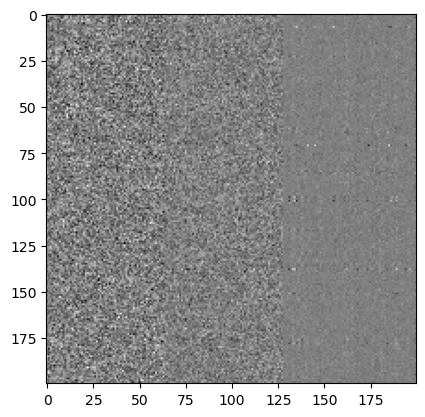

In [40]:
# look at another plot from the cross-attention module (first 2 layers):
plt.imshow(sd_hf["transformer.h.0.attn.c_attn.weight"][:200, :200], cmap="grey")
plt.show()
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:200, :200], cmap="grey")
plt.show()

In [41]:
# inference

from transformers import pipeline, set_seed # type: ignore

gen = pipeline('text-generation', model="gpt2")
set_seed(42)
gen("hello, i am a language model,", max_length=30, num_return_sequences=3)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "hello, i am a language model, i have a language model, and i have a language model that is a little more complex than those languages.\n\nThe fact I am on a language model is that i have a language model that is more complex than those languages. I am a model with a specific function and a function that takes a new value with the given value.\n\nI am, in fact, a model with a new value with the given value, and i am a model that is a little more complex than those languages. I am a model that is a little more complex than those languages.\n\nSo, this is the problem: how do we know that a model is a little more complex than a model with a specific function and a function that takes a new value and returns a new value.\n\nIt's not a problem, and it is not a problem at all.\n\nThe problem is the logic.\n\nIt's not a problem that the model is a little more complex than a model with a specific function, and it's not a problem that the model is a little more complex than 